In [1]:
!nvidia-smi

Wed Apr 13 15:07:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Screen/Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/train/Vittiligo/_16_5139071.jpg  
  inflating: Dataset/train/Vittiligo/_16_5252102.jpg  
  inflating: Dataset/train/Vittiligo/_16_5692344.jpg  
  inflating: Dataset/train/Vittiligo/_16_6113465.jpg  
  inflating: Dataset/train/Vittiligo/_16_6295872.jpg  
  inflating: Dataset/train/Vittiligo/_16_6703006.jpg  
  inflating: Dataset/train/Vittiligo/_16_6805602.jpg  
  inflating: Dataset/train/Vittiligo/_16_7331465.jpg  
  inflating: Dataset/train/Vittiligo/_16_7692657.jpg  
  inflating: Dataset/train/Vittiligo/_16_8289253.jpg  
  inflating: Dataset/train/Vittiligo/_16_8328549.jpg  
  inflating: Dataset/train/Vittiligo/_16_8418756.jpg  
  inflating: Dataset/train/Vittiligo/_16_8539476.jpg  
  inflating: Dataset/train/Vittiligo/_16_8998487.jpg  
  inflating: Dataset/train/Vittiligo/_16_9551536.jpg  
  inflating: Dataset/train/Vittiligo/_16_9809609.jpg  
  inflating: Dataset/train/Vittiligo/_16_9982746.jpg  
  inflating: D

## Importing the Libraries

In [4]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

## Importing the Dataset

In [5]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/train'
valid_path = '/content/Dataset/val'

#### Inception V3

In [6]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# Folders in the Training Set
folders = glob('/content/Dataset/train*')
folders

['/content/Dataset/train']

In [9]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(5, activation='softmax')(x)

In [10]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Training Generator
training_set = train_datagen.flow_from_directory('/content/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 13769 images belonging to 5 classes.


In [14]:
# Testing Generator
test_set = test_datagen.flow_from_directory('/content/Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2982 images belonging to 5 classes.


In [16]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
431/431 [==============================] - 196s 454ms/step - loss: 2.7883 - accuracy: 0.6608 - val_loss: 2.1059 - val_accuracy: 0.7314
Epoch 2/15
431/431 [==============================] - 194s 449ms/step - loss: 2.3048 - accuracy: 0.7510 - val_loss: 1.8034 - val_accuracy: 0.8035
Epoch 3/15
431/431 [==============================] - 192s 445ms/step - loss: 1.9709 - accuracy: 0.7956 - val_loss: 1.3125 - val_accuracy: 0.8394
Epoch 4/15
431/431 [==============================] - 190s 441ms/step - loss: 1.8710 - accuracy: 0.8082 - val_loss: 1.2250 - val_accuracy: 0.8548
Epoch 5/15
431/431 [==============================] - 194s 449ms/step - loss: 2.0732 - accuracy: 0.8138 - val_loss: 1.7174 - val_accuracy: 0.8293
Epoch 6/15
431/431 [==============================] - 196s 454ms/step - loss: 1.8934 - accuracy: 0.8274 - val_loss: 1.6450 - val_accuracy: 0.8501
Epoch 7/15
431/431 [==============================] - 191s 444ms/step - loss: 1.9675 - accuracy: 0.8347 - val_loss: 1.5582 -

## Visualize the model training by plotting Loss Function and Accuracy

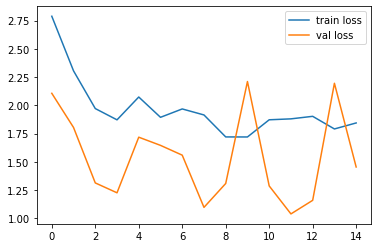

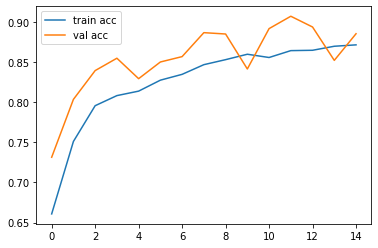

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inceptionv3.h5')

In [20]:
class_dict = training_set.class_indices
print(class_dict)

{'Acne_Disease': 0, 'Eczema': 1, 'Melanoma': 2, 'Tinea': 3, 'Vittiligo': 4}


In [21]:
li = list(class_dict.keys())
print(li)

['Acne_Disease', 'Eczema', 'Melanoma', 'Tinea', 'Vittiligo']


In [22]:
li=['Acne_Disease', 'Eczema', 'Melanoma', 'Tinea', 'Vittiligo']

Following is our prediction:


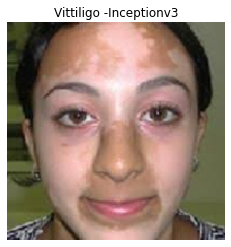

In [29]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/images (19).jpeg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name+ " -Inceptionv3")
plt.show()

In [30]:
y_pred = model.predict(test_set)
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [2.3036442e-20, 1.3349947e-02, 3.1211863e-38, 9.8665005e-01,
        7.8703419e-31],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       ...,
       [2.3875990e-31, 1.0000000e+00, 0.0000000e+00, 1.1679111e-14,
        0.0000000e+00],
       [1.9697132e-28, 4.6220377e-27, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 3, 4, ..., 1, 3, 4])